Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [ ]:
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터를 입력합니다
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/KDT_240424/m6_딥러닝/data/wine.csv')

# 데이터 확인
df.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
5,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
6,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
7,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
8,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1


In [ ]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]
print(X, y)

       7.4   0.7     0  1.9  0.076    11     34   0.9978  3.51  0.56   9.4  5
0      7.8  0.88  0.00  2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8  5
1      7.8  0.76  0.04  2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8  5
2     11.2  0.28  0.56  1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8  6
3      7.4  0.70  0.00  1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4  5
4      7.4  0.66  0.00  1.8  0.075  13.0   40.0  0.99780  3.51  0.56   9.4  5
...    ...   ...   ...  ...    ...   ...    ...      ...   ...   ...   ... ..
6491   6.2  0.21  0.29  1.6  0.039  24.0   92.0  0.99114  3.27  0.50  11.2  6
6492   6.6  0.32  0.36  8.0  0.047  57.0  168.0  0.99490  3.15  0.46   9.6  5
6493   6.5  0.24  0.19  1.2  0.041  30.0  111.0  0.99254  2.99  0.46   9.4  6
6494   5.5  0.29  0.30  1.1  0.022  20.0  110.0  0.98869  3.34  0.38  12.8  7
6495   6.0  0.21  0.38  0.8  0.020  22.0   98.0  0.98941  3.26  0.32  11.8  6

[6496 rows x 12 columns] 0       1
1       1
2       1
3       

In [ ]:
from tensorflow.keras.layers import Input, Dense

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 와인의 숙성을 X, 와인의 분류를 y로 저장합니다
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다
history = model.fit(X_train, y_train, validation_split=0.25, epochs=200, batch_size=32)

# 테스트 데이터를 사용하여 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss : {test_loss}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,741 (6.80 KB)

 Trainable params: 1,741 (6.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 75.7896 - val_loss: 0.1379
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1305 - val_loss: 0.1018
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1080 - val_loss: 0.0955
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1013 - val_loss: 0.0908
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0965 - val_loss: 0.0885
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0926 - val_loss: 0.0854
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840 - val_loss: 0.0664
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0667 - val_loss: 0.0613
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603 - val_loss: 0.0576
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0572 - val_loss: 0.0551
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 - val_loss: 0.0535
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import Input, Dense

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 와인의 숙성을 X, 와인의 분류를 y로 저장합니다
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다
model = Sequential()
model.add(Input(shape=(12,)))   # 첫 번째 레이어로 input 레이어 추가
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 실행합니다
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics=['accuracy'])

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다
history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=500, verbose=0)  # 검증셋 : 0.8 * 0.25 = 0.2

# 테스트 데이터를 사용하여 모델 평가
test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss : {test_acc}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9322 - loss: 0.1777
Test Loss : [0.17363601922988892, 0.9361538290977478]


##.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장의 조건을 설정합니다
modelpath = '/content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다
history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=500, verbose=0, callbacks=[checkpointer])

# 테스트 결과를 출력합니다
score = model.evaluate(X_test, y_test)
print('Test acc :', score[1])


Epoch 1: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all01-0.9361.keras

Epoch 2: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all02-0.9361.keras

Epoch 3: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all03-0.9361.keras

Epoch 4: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all04-0.9361.keras

Epoch 5: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all05-0.9369.keras

Epoch 6: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all06-0.9369.keras

Epoch 7: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all07-0.9369.keras

Epoch 8: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all08-0.9369.keras

Epoch 9: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/all09-0.9369.keras

Epoch 10: saving model to /content/drive/MyDrive/KDT_240424/m6_딥러닝/data/mode

# 그래프로 과적합 확인하기

##History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=500, verbose=0)

In [ ]:
# Print the keys of the history object to understand what metrics are avalialbe
print(history.history.keys())

# To access a specific metric, for example, the training los, you can do
print(history.history['loss'])

# If you also have validation metrics, you can access them like this
print(history.history['val_loss'])  #For validation loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.1400548219680786, 0.13893595337867737, 0.13785329461097717, 0.13679030537605286, 0.13577033579349518, 0.13473959267139435, 0.13371890783309937, 0.1327202022075653, 0.1317526400089264, 0.1307629495859146, 0.1298278123140335, 0.12889434397220612, 0.12796421349048615, 0.12708933651447296, 0.12618125975131989, 0.1253197342157364, 0.12441270798444748, 0.12350238859653473, 0.12266266345977783, 0.12182151526212692, 0.1209830790758133, 0.12020546197891235, 0.11939714103937149, 0.11860757321119308, 0.11783228814601898, 0.11708657443523407, 0.11626708507537842, 0.11545530706644058, 0.11474084109067917, 0.11404315382242203, 0.11335687339305878, 0.11260969936847687, 0.11192744225263596, 0.11123188585042953, 0.11053768545389175, 0.10987429320812225, 0.1093498170375824, 0.10863037407398224, 0.10784091055393219, 0.1072496846318245, 0.10659205168485641, 0.10590513050556183, 0.10527041554450989, 0.10468852519989014, 0.10404934734106064, 0.1

In [ ]:
# history에 저장된 학습 결과를 확인해 봅니다
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.949192,0.140055,0.949961,0.135403
1,0.949192,0.138936,0.950731,0.134410
2,0.949705,0.137853,0.949961,0.133659
3,0.949705,0.136790,0.949961,0.132756
4,0.949448,0.135770,0.949961,0.131750


In [ ]:
hist_df.shape

(2000, 4)

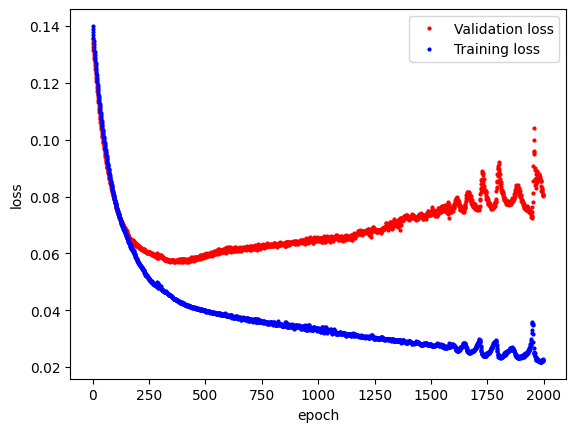

In [ ]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

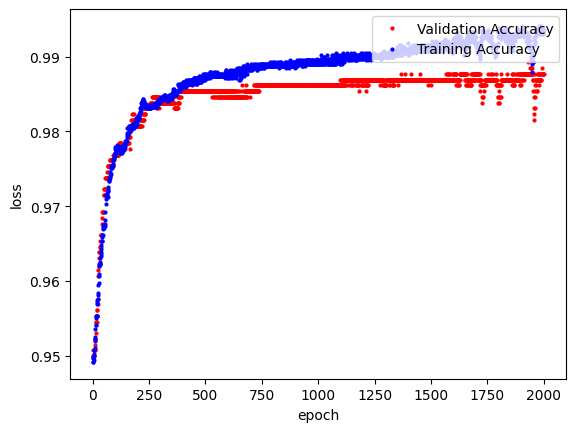

In [ ]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다
# 'acc' 대신 'accuracy'를 사용해야 할 수도 있습니다. 이는 Keras 버전에 따라 다릅니다
y_acc = history.history['accuracy'] # 'acc' 대신 'accuracy'를 사용하는 경우가 있습니다
y_val_acc = history.history['val_accuracy'] # 마찬가지로 'val_accuracy'를 사용

# x 값을 지정합니다
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다
plt.plot(x_len, y_val_acc, 'o', c='red', markersize=2, label='Validation Accuracy')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=2, label='Training Accuracy')

# 범례와 축 라벨을 추가합니다
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

# 그래프르 표시합니다
plt.show()

# 학습의 자동 중단

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   # EarlyStopping 추가
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/KDT_240424/m6_딥러닝/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

###[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다
modelpath = "/content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다
history = model.fit(X_train, y_train, validation_split=0.25, epochs=500, batch_size=500, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2473 - loss: 20.9778 - val_accuracy: 0.2115 - val_loss: 14.9281
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2111 - loss: 12.6846 - val_accuracy: 0.1546 - val_loss: 8.0601
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1401 - loss: 6.4213 - val_accuracy: 0.1331 - val_loss: 2.5203
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3309 - loss: 1.7091 - val_accuracy: 0.7615 - val_loss: 0.7878
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7474 - loss: 0.8786 - val_accuracy: 0.7631 - val_loss: 0.9121
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7510 - loss: 0.9741 - val_accuracy: 0.7631 - val_loss: 0.8507
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7511 - loss: 0.8704 - val_accuracy: 0.7638 - val_loss: 0.6574
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7537 - loss: 0.6425 - val_accuracy: 0.7854 - val_los

In [ ]:
# 테스트 결과를 출력합니다
score = model.evaluate(X_test, y_test)
print("Test Accuracy :", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9903 - loss: 0.0343 
Test Accuracy : 0.9876922965049744


In [ ]:
# 최적화 된 모델이 bestmodel.keras 파일에 저장되면, 이 파일을 로드하여 예측 또는 추가 학습에 사용
from tensorflow.keras.models import load_model

# 저장 된 모델 로드
best_model_path = '/content/drive/MyDrive/KDT_240424/m6_딥러닝/data/model/bestmodel.keras'
model = load_model(best_model_path)

# 모델 요약 출력 (선택사항)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)